## 2-D Oriented Bounding Box
In this notebook, I provide simple scripts to plot 2-D oriented bounding box.

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from numpy.linalg import norm
from sklearn.decomposition import PCA

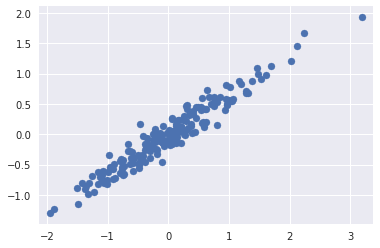

In [15]:
rng = np.random.RandomState(401)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [16]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
def draw_vector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth = 1,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

(-2.213182346614845, 3.4550165959594743, -1.477329101164345, 2.108794574341146)

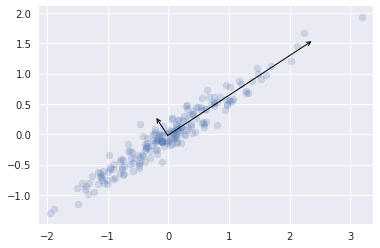

In [4]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

### There are three main steps in plotting oriented bounding box (OBB):
* Calculate the coordinates using principal components analysis (PCA)
* Calculate the projections of each point on to the PCA components
* Calculate the four corners in the PCA coordinates
* Calculate (rotate) the four corners back in the original coodinate

In [5]:
def bbox_2D(X):
    '''
    Finding the four corners of an oriented bounding box (OBB)
    Input: 
         X:  points in 2-D, (num, 2)
    Output:
         cornors_rot: four corners of OBB
    '''
    # Carry out the principle component analysis
    pca = PCA(n_components = 2)
    pca.fit(X)
    x_axis = pca.components_[0]  # We follow the convention of denoting the larger eigenvector as x
    x_axis = x_axis if np.dot(x_axis, [1, 0]) > 0 else - x_axis # reverse the orientation if necessary
    x_axis = x_axis /norm(x_axis)
    
    y_axis = pca.components_[1] # We follow the convention of denoting the smaller eigenvector as y
    y_axis = y_axis if np.dot(y_axis, [0, 1]) > 0 else - y_axis # reverse the orientation if necessary
    y_axis = y_axis /norm(y_axis)
    
    
    # Find the centroid of the cluster
    C = np.mean(X, axis=0 )  
    X = X - C  
    
    # Calculate each point's projection on the two PCA components
    dist_x = np.dot(X, x_axis)
    dist_y = np.dot(X, y_axis)
    
    # Calculate the four conners in the original coordinate system
    x1, x2, y1, y2 = dist_x.max(), dist_x.min(), dist_y.max(), dist_y.min()
    cornors = [[x1, y1], [x1, y2], [x2, y2], [x2, y1]] + C
    
    # Determine the four conners in the PCA axes
    s_base = [1, 0]
    a = np.dot(x_axis, s_base)/norm(s_base) 
    theta = np.arccos(np.clip(a, -1, 1))  # Find the roation angle
    rot_mat = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]) # Construct rotation matrix
    # Cornor points in the PCA coordinates
    cornors_rot = [ np.dot(rot_mat, np.array(x).T) for x in cornors] 
    return cornors_rot

length:  0.5368762833199922 vector:  [0.68739663 0.72628223]
length:  0.01657998651594561 vector:  [ 0.72628223 -0.68739663]


(-1.5812939974605251,
 2.0152162754486134,
 -1.772222094386933,
 1.9603744096783386)

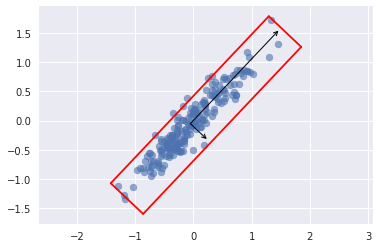

In [13]:
rng = np.random.RandomState(900)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], alpha = 0.6)
plt.axis('equal');
pca = PCA(n_components=2)
pca.fit(X)

for length, vector in zip(pca.explained_variance_, pca.components_):
    print('length: ', length, 'vector: ', vector)
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

cornors_rot = bbox_2D(X)    



for i  in  range(4):
    cor1, cor2 = cornors_rot[i % 4], cornors_rot[(i+1) % 4]
    plt.plot([cor1[0], cor2[0]], [cor1[1], cor2[1]], 'r-')
plt.axis('equal')